A chi si rivolge: ragazzi delle superiori

Conoscenze pregresse: conoscenze di base di matematica (calcolo della probabilità) e conoscenze di base di programmazione (funzioni, for cycles)


# Lezione 2
## Il paradosso dei compleanni, metodo Montecarlo

Vi siete mai chiesti quante probabilità ci siano che in una classe di x persone ce ne siano almeno due che compiano gli anni nello stesso giorno dell'anno?
Grazie a python, possiamo immaginare di avere un numero n di classi con un numero x di alunni, e questo ci permette di capire in che modo varia la probabilità.
Vedremo infatti come scrivere un codice che ci permetta di assegnare casualmente un compleanno ad ogni elemento di un insieme e che definirà, poi, una funzione che, dato un numero di elementi (il numero di studenti della classe) e il numero di tentativi (cioè il numero di classi da considerare), restituirà la probabilità che ci siano due elementi a cui è stato assegnato lo stesso giorno.

Per poter avere una situazione che sia il più possibile fedele alla realtà, ma allo stesso tempo non trovarci a dover scrivere codici troppo complessi, consideriamo come data del compleanno il giorno dell'anno su 365 e non il giorno del mese (il primo gennaio sarà 1, il due gennaio 2 e così via).
Ma come possiamo calcolare il giorno dell'anno avendo il giorno e il mese? Finchè siamo a gennaio è ancora facile farlo a mente, ma se dovessimo calcolare, ad esempio, a che numero corrisponde il 14 febbraio? Per semplificare questo proceddimento di conversione, abbiamo scritto in python una funzione che esegue questi calcoli.

In [5]:
def calcola_giorno(x):
    y = x.split(' ')
    if y[1] == "gennaio":
        return y[0]
    if y[1] == 'febbraio':
        return int(y[0]) +31
    if y[1] == 'marzo':
        return int(y[0]) +59
    if y[1] == "aprile":
        return int(y[0]) +90
    if y[1] == "maggio":
        return int(y[0]) +120
    if y[1] == "giugno":
        return int(y[0]) +151
    if y[1] == "luglio":
        return int(y[0]) +181
    if y[1] == "agosto":
        return int(y[0]) +212
    if y[1] == "settembre":
        return int(y[0]) +243
    if y[1] == "ottobre":
        return int(y[0]) +273
    if y[1] == "novembre":
        return int(y[0]) +304
    if y[1] == "dicembre":
        return int(y[0]) +334

Proviamo a fare qualche tentativo

In [6]:
calcola_giorno("20 luglio")

201

In [7]:
calcola_giorno("11 novembre")

315

Per completezza, abbiamo scritto anche la funzione che converte il numero nella data dell'anno

In [8]:
def calcola_data(x):
    if x <= 31:
        return '%s gennaio' % x
    if 31 < x <= 59:
        return str(x - 31) + ' febbraio'
    if 59 < x <= 90:
        return str(x - 59) + ' marzo'
    if 90 < x <= 120:
        return str(x - 90) + ' aprile'
    if 120 < x <= 151:
        return str(x - 120) + ' maggio'
    if 151 < x <= 181:
        return str(x - 151) + ' giugno'
    if 181 < x <= 212:
        return str(x - 181) + ' luglio'
    if 212 < x <= 243:
        return str(x - 212) + ' agosto'
    if 243 < x <= 273:
        return str(x - 243) + ' settembre'
    if 273 < x <= 304:
        return str(x - 273) + ' ottobre'
    if 304 < x <= 334:
        return str(x - 304) + ' novembre'
    if 334 < x <= 365:
        return str(x - 334) + ' dicembre'

In [9]:
calcola_data(201)

'20 luglio'

In [10]:
calcola_data(315)

'11 novembre'

A questo punto, possiamo iniziare a risolvere il problema vero e proprio. Iniziamo col simulare la classe:

In [11]:
from random import random

Definiamo ora una funzione che ci permetterà, dopo aver assegnato ad ogni elemento della classe un numero casuale, compreso fra 0 (escluso) e 365 (incluso), che rappresenterà il giorno del compleanno, di calcolare il numero di collisioni (che chiamaremo "totale") che avvengono: cosa vuol dire? Python andrà a controllare se nella lista in cui ad ogni elemento della nostra classe ha assegnato un numero ci sono delle collisioni, ovvero dei numeri che ricorrono più di una volta ("if compleanni.count(X) >= 2") e andrà a sommare il numero di collisioni.

In [12]:
def collision(i):
    compleanni = [round(random()*364) +1 for x in i]
    if len(set(compleanni)) != len(compleanni):
        return True
    else:
        return False

A questo punto, possiamo eseguire "collision" sulla nostra classe

In [13]:
classe = range(30)

In [14]:
collision(classe)

True

Sappiamo che la probabilità si calcola facendo il rapporto fra il numero di casi favorevoli e il numero di casi totali, quindi definiamo la funzione che calcolerà questo rapporto

In [15]:
def prob(numero_persone, numero_prove = 1000):
    classe = range(numero_persone)
    tentativi = [collision(classe) for x in range(numero_prove)]
    return sum(tentativi)/len(tentativi)*100

Chiamiamo ora la funzione per avere la probabilità

In [16]:
prob(23,20)

40.0

In [17]:
prob(23)

52.5

Vogliamo ora vedere come vari la probabilità al variare del numero di persone nell'intervallo da zero a cento

In [18]:
ls = range(100)

In [19]:
prob_tot = [prob(x) for x in ls]

In questo modo abbiamo ottenuto la lista delle probabilità calcolata in base al numero di elementi (da 0 a 100)

In [20]:
prob_tot

[0.0,
 0.0,
 0.5,
 0.7000000000000001,
 2.3,
 3.5000000000000004,
 5.5,
 6.3,
 7.3,
 10.299999999999999,
 12.0,
 14.000000000000002,
 17.2,
 21.7,
 21.3,
 26.3,
 30.3,
 32.300000000000004,
 36.0,
 37.5,
 42.0,
 45.5,
 48.0,
 49.4,
 54.900000000000006,
 58.5,
 58.5,
 63.6,
 63.4,
 68.60000000000001,
 70.7,
 72.5,
 75.7,
 74.9,
 80.0,
 82.89999999999999,
 82.1,
 84.39999999999999,
 86.8,
 87.1,
 87.7,
 91.3,
 91.4,
 93.10000000000001,
 92.2,
 94.8,
 95.1,
 95.89999999999999,
 95.6,
 96.7,
 97.6,
 97.2,
 97.89999999999999,
 98.1,
 98.0,
 99.1,
 98.8,
 98.8,
 99.4,
 99.0,
 99.5,
 99.6,
 99.9,
 99.6,
 99.8,
 99.9,
 99.9,
 99.7,
 99.7,
 99.9,
 99.7,
 99.9,
 100.0,
 100.0,
 100.0,
 100.0,
 99.9,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0]

Disegnamo ora il grafico che rappresenti l'andamento della probabilità al crescere degli elementi nell'insieme (il numero di studenti nella classe)

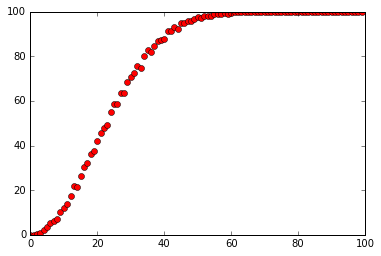

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
_ = plt.plot([ls],[prob_tot], "ro")